In [12]:
import yfinance as yf
import pandas as pd

In [13]:
# Define the ticker symbol (GameStop: GME)
gme = yf.Ticker("GME")

# Fetch historical data (max period)
gme_data = gme.history(period="max")

# Reset the index to convert "Date" from an index to a column
gme_data.reset_index(inplace=True)

In [14]:
gme_data.to_csv("gme_data.csv", index=False)  # Save without row indices

In [15]:
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


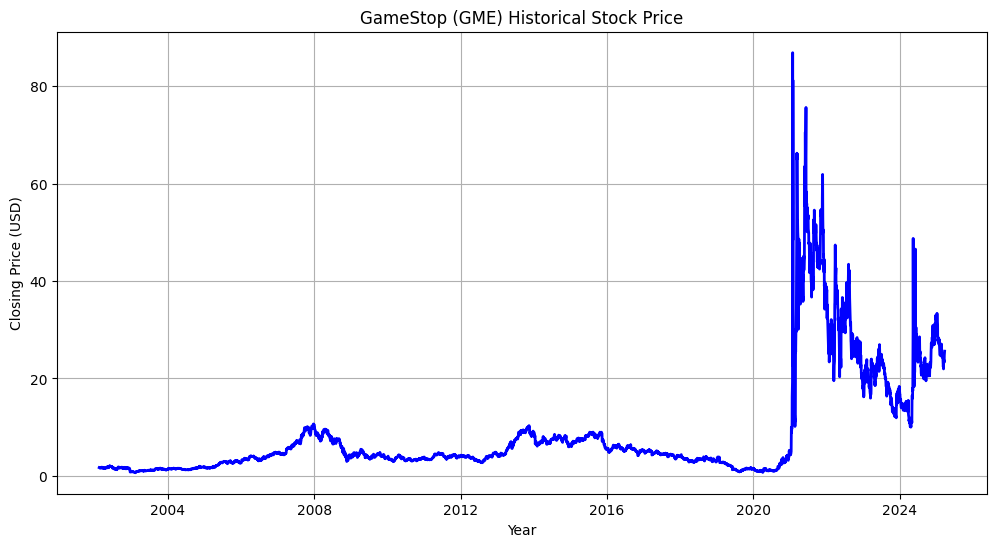

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download GameStop (GME) historical stock data
gme_data = yf.download("GME", period="max")

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], color='blue', linewidth=2)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Closing Price (USD)')
    plt.grid(True)
    plt.show()

# Generate the graph with a title
make_graph(gme_data, "GameStop (GME) Historical Stock Price")

[*********************100%***********************]  1 of 1 completed


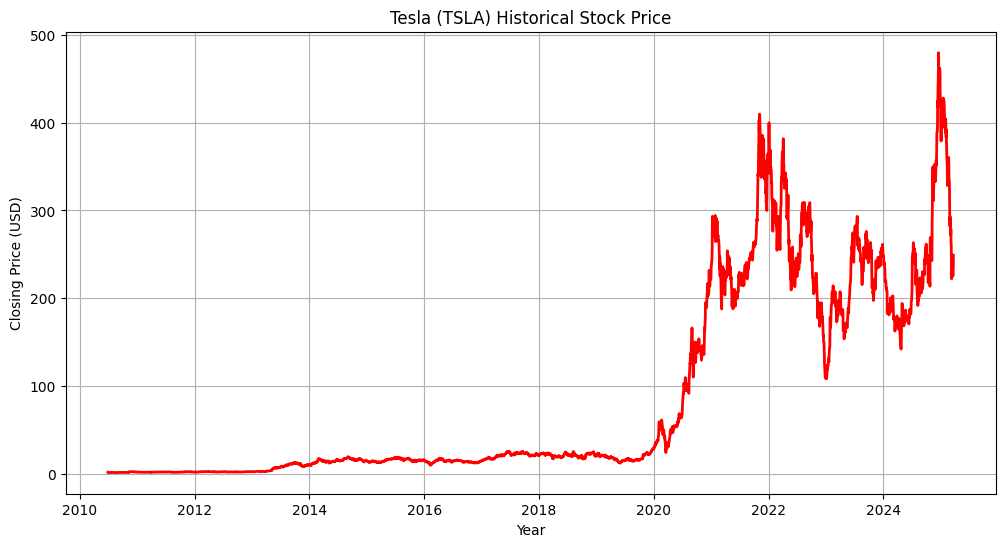

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Tesla (TSLA) historical stock data
tsla_data = yf.download("TSLA", period="max")

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], color='red', linewidth=2)  # Using red for Tesla
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Closing Price (USD)')
    plt.grid(True)
    plt.show()

# Generate the graph with a title
make_graph(tsla_data, "Tesla (TSLA) Historical Stock Price")

In [5]:
pip install requests beautifulsoup4 pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the Wikipedia page containing GameStop's revenue data
url = "https://en.wikipedia.org/wiki/GameStop"

# Send a GET request to fetch the webpage content
response = requests.get(url)
html_content = response.text

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Find the table containing revenue data (look for the "GameStop revenue" table)
tables = soup.find_all("table", class_="wikitable")
revenue_table = tables[1]  # Adjust index if the page structure changes

# Extract table headers and rows
headers = []
rows = []

# Extract headers
for th in revenue_table.find_all("th"):
    headers.append(th.text.strip())

# Extract rows
for tr in revenue_table.find_all("tr")[1:]:  # Skip header row
    row_data = [td.text.strip() for td in tr.find_all("td")]
    if len(row_data) == len(headers):
        rows.append(row_data)

# Create DataFrame
gme_revenue = pd.DataFrame(rows, columns=headers)

# Clean the data (remove commas and convert to numeric)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "").astype(float)

# Display the last 5 rows
print(gme_revenue.tail())

KeyError: 'Revenue'

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"


headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Fetch the webpage content
response = requests.get(url, headers=headers)
html_content = response.text

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Find the revenue table (look for the table with "Tesla Quarterly Revenue" or "Annual Revenue")
table = soup.find("table", {"class": "historical_data_table"})

# Extract headers and rows
headers = [th.text.strip() for th in table.find_all("th")]
rows = []
for tr in table.find_all("tr")[1:]:  # Skip header row
    row_data = [td.text.strip() for td in tr.find_all("td")]
    rows.append(row_data)

# Create DataFrame
tesla_revenue = pd.DataFrame(rows, columns=headers)

# Clean the "Revenue" column (remove $ and commas)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", ""

SyntaxError: incomplete input (1422057672.py, line 34)